# I. Lý thuyết

1) Mạng tích chập CNN sẽ được thực hiện như thế nào?

A. Phân chia feature map thành các ma trận theo chiều channel và thực hiện tích chập giữa mỗi ma trận kernel với từng chiều.

B. Thực hiện phép nhân ma trận kernel với chuyển vị của ma trận local receptive field để thu được giá trị feature map output.

C. Tính trung bình các phân tử trên một ma trận local receptive field.

**D. Di chuyển vùng local receptive field theo chiều từ trái sang phải và từ trên xuống dưới và nhân tích chập với kernel để thu được ma trận feature map.**

2) Thực hiện phép nhân tích chập giữa ma trận đầu vào kích thước width và height lần lượt là $(W, H)$ với bộ lọc kích thước $(F, F)$ và bước nhảy $S$ thì thu được ma trận đầu ra với kích thước width và height $(W', H')$ là bao nhiêu? Hãy lựa chọn công thức tổng quát nhất.

A. $W' =⌊ \frac{W-F}{S} ⌋ + 1;~ H' =⌊ \frac{H-F}{S} ⌋ + 1$

B. $W' =\lceil \frac{W-F}{S} \rceil + 1;~ H' = \lceil \frac{H-F}{S} \rceil + 1$ 

**C. $W' =\lfloor \frac{W-F+2P}{S} \rfloor + 1;~ H' = \lfloor \frac{H-F+2P}{S} \rfloor + 1$ với $P$ là số lượng các véc tơ 0 padding ở bên ngoài đều hai phía.**

D. $W' =\lceil \frac{W-F+P}{S} \rceil + 1;~ H' = \lceil \frac{H-F+P}{S} \rceil + 1$ với $P$ là số lượng các véc tơ 0 padding ở bên ngoài đều hai phía.

3) Mạng CNN sẽ học được những gì qua các layers?

A. Tại những layers đầu mỗi channels sẽ giúp phân biệt một loại đặc trưng, của vật thể. Những đặc trưng này sau đó được trải phẳng và đưa vào mạng MLP để phân loại vật thể.

B. Những layers cuối cùng sẽ zoom vào từng chi tiết của vật thể để phân loại vật thể.

**C. Tại những layers đầu mạng sẽ học được các đặc trưng chung như các edge dọc, ngang, chéo,.... Các đặc trưng chi tiết và tổng quát giúp nhận diện vật thể được học tại những layers cuối cùng.**

D. Các layers đầu tiên sẽ tập trung vào các chi tiết bộ phận của vật thể.

4) Kiến trúc chung của một mạng CNN là gì?

A. _[Conv -> BatchNorm -> Activation -> Maxpooling] x n_

B. _[BatchNorm -> Conv -> Activation -> Maxpooling] x n_ 

C. _[Conv -> BatchNorm -> Maxpooling -> Activation -> Maxpooling] x n_ 

**D. _[Conv -> BatchNorm -> Maxpooling -> Activation -> Maxpooling] x n -> Flatten -> [FullyConnected -> Activation] x m -> Softmax_** 

5) Thông thường đặc điểm kích thước feature map của mạng neural sẽ như thế nào ?

A. Kích thước feature map tăng dần gấp đôi qua thời gian.

B. Kích thước feature map sẽ duy trì không đổi qua thời gian.

C. Kích thước mạng sẽ giảm dần gấp đôi sau mỗi một lần downsampling và sau đó tăng dần gấp đôi sau mỗi lần upsampling để khôi phục về kích thước ảnh input.

**D. Kích thước mạng thường giảm gấp đôi sau một lần downsampling và số lượng các filters tăng dần.**

# II. Thực hành

##6) Thực hiện xây dựng và huấn luyện một mạng CNN ngẫu nhiên trên bộ dữ liệu [Dog and Cat](https://www.kaggle.com/c/dog-vs-cat-classification/data). Lưu ý cần thực hiện [chuẩn hóa dữ liệu](https://github.com/pytorch/examples/issues/112) đối với bộ dữ liệu ImageNet trước khi huấn luyện.

**Thực hành trên Tensorflow**

In [ ]:
from google.colab import drive
import os
drive.mount("/content/drive")
folder_path = "/content/drive/MyDrive/DLK1/Data_Cat_Dog/"
os.chdir(folder_path)

Mounted at /content/drive


In [ ]:
import cv2
import numpy as np
import os
from keras.preprocessing.image import ImageDataGenerator
import tensorflow

In [ ]:
# Other libraries we'll use
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [ ]:
import numpy as np
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator,load_img
#from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os

In [ ]:
from tensorflow.keras.optimizers import SGD

In [ ]:
import matplotlib.image as mpimg

In [ ]:
from PIL import Image

In [ ]:
train_path="/content/drive/MyDrive/DLK1/Data_Cat_Dog/train"
test_path="/content/drive/MyDrive/DLK1/Data_Cat_Dog/test"
class_names_train=os.listdir(train_path)
class_names_test=os.listdir(test_path)

In [ ]:
print(class_names_train)


['cats', 'dogs']


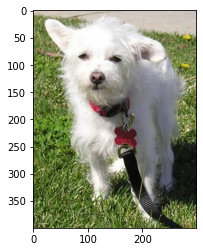

In [ ]:
image_dog=plt.imread('/content/drive/MyDrive/DLK1/Data_Cat_Dog/train/dogs/dog.12499.jpg',1)
plt.imshow(image_dog)
plt.show()

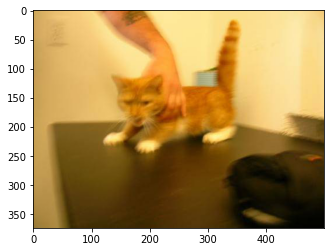

In [ ]:
image_cat=plt.imread('/content/drive/MyDrive/DLK1/Data_Cat_Dog/train/cats/cat.0.jpg',1)
plt.imshow(image_cat)

In [ ]:
# The images are in the data/shapes folder
data_folder = '/content/drive/MyDrive/DLK1/Data_Cat_Dog/train'

2 classes:
['cats', 'dogs']


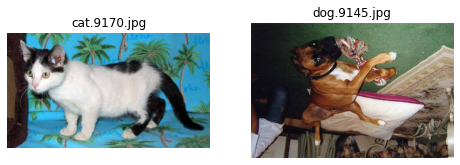

In [ ]:


# Get the class names
classes = os.listdir(data_folder)
classes.sort()
print(len(classes), 'classes:')
print(classes)

# Show the first image in each folder
fig = plt.figure(figsize=(8, 12))
i = 0
for sub_dir in os.listdir(data_folder):
    i+=1
    img_file = os.listdir(os.path.join(data_folder,sub_dir))[0]
    img_path = os.path.join(data_folder, sub_dir, img_file)
    img = mpimg.imread(img_path)
    a=fig.add_subplot(1, len(classes),i)
    a.axis('off')
    imgplot = plt.imshow(img)
    a.set_title(img_file)
plt.show()

In [ ]:
#from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_size = (128, 128)
batch_size = 50

print("Getting Data...")
datagen = ImageDataGenerator(rescale=1./255, # normalize pixel values
                             validation_split=0.3) # hold back 30% of the images for validation

print("Preparing training dataset...")
train_generator = datagen.flow_from_directory(
    data_folder,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training') # set as training data

print("Preparing validation dataset...")
validation_generator = datagen.flow_from_directory(
    data_folder,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation') # set as validation data

classnames = list(train_generator.class_indices.keys())
print('Data generators ready')

Getting Data...
Preparing training dataset...
Found 17500 images belonging to 2 classes.
Preparing validation dataset...
Found 7500 images belonging to 2 classes.
Data generators ready


In [ ]:
# Define a CNN classifier network
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

# Define the model as a sequence of layers
model = Sequential()

# The input layer accepts an image and applies a convolution that uses 32 6x6 filters and a rectified linear unit activation function
model.add(Conv2D(16, (5, 5), input_shape=train_generator.image_shape, activation='relu'))

# Next we'll add a max pooling layer with a 2x2 patch
model.add(MaxPooling2D(pool_size=(2,2)))

# We can add as many layers as we think necessary - here we'll add another convolution and max pooling layer
model.add(Conv2D(16, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# And another set
#model.add(Conv2D(16, (5, 5), activation='relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))

# A dropout layer randomly drops some nodes to reduce inter-dependencies (which can cause over-fitting)
#model.add(Dropout(0.2))

# Flatten the feature maps 
model.add(Flatten())

# Generate a fully-connected output layer with a predicted probability for each class
# (softmax ensures all probabilities sum to 1)
model.add(Dense(train_generator.num_classes, activation='softmax'))

# With the layers defined, we can now compile the model for categorical (multi-class) classification
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 124, 124, 16)      1216      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 62, 62, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 58, 58, 16)        6416      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 29, 29, 16)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 13456)             0         
                                                                 
 dense (Dense)               (None, 2)                 2

In [ ]:
# Train the model over 5 epochs using 30-image batches and using the validation holdout dataset for validation
num_epochs = 5
history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // batch_size,
    epochs = num_epochs)

Epoch 1/5
273/273 [==============================] - 5156s 19s/step - loss: 0.6736 - accuracy: 0.5967 - val_loss: 0.6396 - val_accuracy: 0.6315
Epoch 2/5
273/273 [==============================] - 118s 431ms/step - loss: 0.6315 - accuracy: 0.6543 - val_loss: 0.6279 - val_accuracy: 0.6571
Epoch 3/5
273/273 [==============================] - 117s 427ms/step - loss: 0.6084 - accuracy: 0.6776 - val_loss: 0.6271 - val_accuracy: 0.6704
Epoch 4/5
273/273 [==============================] - 115s 423ms/step - loss: 0.5535 - accuracy: 0.7207 - val_loss: 0.5450 - val_accuracy: 0.7250
Epoch 5/5
273/273 [==============================] - 118s 431ms/step - loss: 0.4948 - accuracy: 0.7636 - val_loss: 0.4912 - val_accuracy: 0.7674


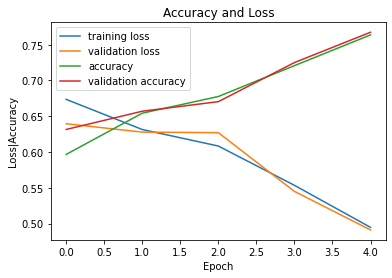

In [ ]:
fig = plt.figure()
numOfEpoch = 5
plt.plot(np.arange(0, numOfEpoch), history.history['loss'], label='training loss')
plt.plot(np.arange(0, numOfEpoch), history.history['val_loss'], label='validation loss')
plt.plot(np.arange(0, numOfEpoch), history.history['accuracy'], label='accuracy')
plt.plot(np.arange(0, numOfEpoch), history.history['val_accuracy'], label='validation accuracy')
plt.title('Accuracy and Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss|Accuracy')
plt.legend()

Thực hành trên Pytorch

In [ ]:
# Import PyTorch libraries
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable
import torch.nn.functional as F

# Other libraries we'll use
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

print("Libraries imported - ready to use PyTorch", torch.__version__)

Libraries imported - ready to use PyTorch 1.10.0+cu111


In [ ]:
image_size = (128,128)
image_row_size = image_size[0] * image_size[1]

In [ ]:
# The images are in the data/shapes folder
data_path = '/content/drive/MyDrive/DLK1/Data_Cat_Dog/train'

2 classes:
['cats', 'dogs']


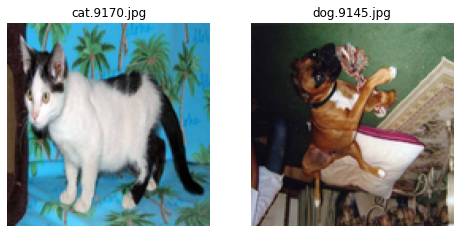

In [ ]:


# Get the class names
classes = os.listdir(data_path)
classes.sort()
print(len(classes), 'classes:')
print(classes)

# Show the first image in each folder
fig = plt.figure(figsize=(8, 12))
i = 0
for sub_dir in os.listdir(data_path):
    i+=1
    img_file = os.listdir(os.path.join(data_path,sub_dir))[0]
    img_path = os.path.join(data_path, sub_dir, img_file)
    #img = mpimg.imread(img_path)
    img = Image.open(img_path)
    img = img.resize(img_size, Image.ANTIALIAS)
    a=fig.add_subplot(1, len(classes),i)
    a.axis('off')
    imgplot = plt.imshow(img)
    a.set_title(img_file)
plt.show()

In [ ]:
# Function to ingest data using training and test loaders
def load_dataset(data_path):
    # Load all of the images
    transformation = transforms.Compose([
        transforms.Resize(image_size),                                 
        # transform to tensors
        transforms.ToTensor(),
        # Normalize the pixel values (in R, G, and B channels)
        transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
    ])

    # Load all of the images, transforming them
    full_dataset = torchvision.datasets.ImageFolder(
        root=data_path,
        transform=transformation
    )
    
    
    # Split into training (70% and testing (30%) datasets)
    train_size = int(0.7 * len(full_dataset))
    test_size = len(full_dataset) - train_size
    train_dataset, test_dataset = torch.utils.data.random_split(full_dataset, [train_size, test_size])
    
    # define a loader for the training data we can iterate through in 50-image batches
    train_loader = torch.utils.data.DataLoader(
        train_dataset,
        batch_size=50,
        num_workers=0,
        shuffle=True
    )
    
    # define a loader for the testing data we can iterate through in 50-image batches
    test_loader = torch.utils.data.DataLoader(
        test_dataset,
        batch_size=50,
        num_workers=0,
        shuffle=False
    )
        
    return train_loader, test_loader


# Get the iterative dataloaders for test and training data
train_loader, test_loader = load_dataset(data_path)
print('Data loaders ready')

Data loaders ready


In [ ]:
print(train_loader.dataset[0])

(tensor([[[-0.5922, -0.5765, -0.5843,  ..., -0.5373, -0.3098, -0.2941],
         [-0.5765, -0.5765, -0.5765,  ..., -0.5294, -0.2863, -0.2706],
         [-0.5686, -0.5608, -0.5686,  ..., -0.5059, -0.2706, -0.2627],
         ...,
         [-0.5373, -0.6941, -0.7255,  ..., -0.6235, -0.6706, -0.6784],
         [-0.5608, -0.7176, -0.7490,  ..., -0.6314, -0.6784, -0.6784],
         [-0.5529, -0.7098, -0.7490,  ..., -0.6314, -0.6784, -0.6784]],

        [[-0.6392, -0.6235, -0.6314,  ..., -0.5922, -0.4275, -0.4353],
         [-0.6235, -0.6235, -0.6235,  ..., -0.5843, -0.4039, -0.4039],
         [-0.6157, -0.6078, -0.6157,  ..., -0.5686, -0.3882, -0.3961],
         ...,
         [-0.5608, -0.7255, -0.7647,  ..., -0.6863, -0.7020, -0.7176],
         [-0.5608, -0.7255, -0.7647,  ..., -0.7020, -0.7098, -0.7098],
         [-0.5451, -0.7176, -0.7647,  ..., -0.7020, -0.7098, -0.7176]],

        [[-0.7333, -0.7176, -0.7255,  ..., -0.7647, -0.6706, -0.6706],
         [-0.7176, -0.7176, -0.7176,  ..., -

In [ ]:
# Create a neural net class
class Net(nn.Module):
    # Constructor
    def __init__(self, num_classes=3):
        super(Net, self).__init__()
        
        # Our images are RGB, so input channels = 3. We'll apply 12 filters in the first convolutional layer
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=12, kernel_size=3, stride=1, padding=1)
        
        # We'll apply max pooling with a kernel size of 2
        self.pool = nn.MaxPool2d(kernel_size=2)
        
        # A second convolutional layer takes 12 input channels, and generates 12 outputs
        self.conv2 = nn.Conv2d(in_channels=12, out_channels=12, kernel_size=3, stride=1, padding=1)
        
        # A third convolutional layer takes 12 inputs and generates 24 outputs
        self.conv3 = nn.Conv2d(in_channels=12, out_channels=24, kernel_size=3, stride=1, padding=1)
        
        # A drop layer deletes 20% of the features to help prevent overfitting
        self.drop = nn.Dropout2d(p=0.2)
        
        # Our 128x128 image tensors will be pooled twice with a kernel size of 2. 128/2/2 is 32.
        # So our feature tensors are now 32 x 32, and we've generated 24 of them
        # We need to flatten these and feed them to a fully-connected layer
        # to map them to  the probability for each class
        self.fc = nn.Linear(in_features=32 * 32 * 24, out_features=num_classes)

    def forward(self, x):
        # Use a relu activation function after layer 1 (convolution 1 and pool)
        x = F.relu(self.pool(self.conv1(x)))
      
        # Use a relu activation function after layer 2 (convolution 2 and pool)
        x = F.relu(self.pool(self.conv2(x)))
        
        # Select some features to drop after the 3rd convolution to prevent overfitting
        x = F.relu(self.drop(self.conv3(x)))
        
        # Only drop the features if this is a training pass
        x = F.dropout(x, training=self.training)
        
        # Flatten
        x = x.view(-1, 32 * 32 * 24)
        # Feed to fully-connected layer to predict class
        x = self.fc(x)
        # Return log_softmax tensor 
        return F.log_softmax(x, dim=1)
    
print("CNN model class defined!")

CNN model class defined!


In [ ]:
def train(model, device, train_loader, optimizer, epoch):
    loss_criteria = nn.CrossEntropyLoss()
    # Set the model to training mode
    model.train()
    train_loss = 0
    print("Epoch:", epoch)
    # Process the images in batches
    for batch_idx, (data, target) in enumerate(train_loader):
        # Use the CPU or GPU as appropriate
        data, target = data.to(device), target.to(device)
        
        # Reset the optimizer
        optimizer.zero_grad()
        
        # Push the data forward through the model layers
        output = model(data)
        
        # Get the loss
        loss = loss_criteria(output, target)
        
        # Keep a running total
        train_loss += loss.item()
        
        # Backpropagate
        loss.backward()
        optimizer.step()
        
        # Print metrics for every 10 batches so we see some progress
        if batch_idx % 10 == 0:
            print('Training set [{}/{} ({:.0f}%)] Loss: {:.6f}'.format(
                batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))
            
    # return average loss for the epoch
    avg_loss = train_loss / (batch_idx+1)
    print('Training set: Average loss: {:.6f}'.format(avg_loss))
    return avg_loss
            

In [ ]:
def test(model, device, test_loader):
    loss_criteria = nn.CrossEntropyLoss()
    # Switch the model to evaluation mode (so we don't backpropagate or drop)
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        batch_count = 0
        for data, target in test_loader:
            batch_count += 1
            data, target = data.to(device), target.to(device)
            
            # Get the predicted classes for this batch
            output = model(data)
            
            # Calculate the loss for this batch
            test_loss += loss_criteria(output, target).item()
            
            # Calculate the accuracy for this batch
            _, predicted = torch.max(output.data, 1)
            correct += torch.sum(target==predicted).item()

    # Calculate the average loss and total accuracy for this epoch
    avg_loss = test_loss/batch_count
    print('Validation set: Average loss: {:.6f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        avg_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))
    avg_acc = correct / len(test_loader.dataset)
    # return average loss for the epoch
    return avg_loss, avg_acc

In [ ]:
# Now use the train and test functions to train and test the model    
def train_model():
  device = "cpu"
  if (torch.cuda.is_available()):
      # if GPU available, use cuda (on a cpu, training will take a considerable length of time!)
      device = "cuda"
  print('Training on', device)

  # Create an instance of the model class and allocate it to the device
  model = Net(num_classes=len(classes)).to(device)

  # Use an "Adam" optimizer to adjust weights
  # (see https://pytorch.org/docs/stable/optim.html#algorithms for details of supported algorithms)
  optimizer = optim.Adam(model.parameters(), lr=0.001)

  # Specify the loss criteria
  loss_criteria = nn.CrossEntropyLoss()

  # Track metrics in these arrays
  epoch_nums = []
  training_loss = []
  validation_loss = []
  acc = []

  # Train over 5 epochs (in a real scenario, you'd likely use many more)
  epochs = 5
  for epoch in range(1, epochs + 1):
          train_loss = train(model, device, train_loader, optimizer, epoch)
          test_loss, test_acc = test(model, device, test_loader)
          epoch_nums.append(epoch)
          training_loss.append(train_loss)
          validation_loss.append(test_loss)
          acc.append(test_acc)
  return (epoch_nums, training_loss, validation_loss, acc)

In [ ]:
epoch_nums1, training_loss1, validation_loss1, acc1=train_model()

Training on cuda
Epoch: 1
Training set [0/17500 (0%)] Loss: 0.696878
Training set [500/17500 (3%)] Loss: 0.683221
Training set [1000/17500 (6%)] Loss: 0.680886
Training set [1500/17500 (9%)] Loss: 0.683496
Training set [2000/17500 (11%)] Loss: 0.669614
Training set [2500/17500 (14%)] Loss: 0.638279
Training set [3000/17500 (17%)] Loss: 0.592249
Training set [3500/17500 (20%)] Loss: 0.663127
Training set [4000/17500 (23%)] Loss: 0.680929
Training set [4500/17500 (26%)] Loss: 0.686770
Training set [5000/17500 (29%)] Loss: 0.677407
Training set [5500/17500 (31%)] Loss: 0.748504
Training set [6000/17500 (34%)] Loss: 0.641302
Training set [6500/17500 (37%)] Loss: 0.576564
Training set [7000/17500 (40%)] Loss: 0.537876
Training set [7500/17500 (43%)] Loss: 0.596003
Training set [8000/17500 (46%)] Loss: 0.563698
Training set [8500/17500 (49%)] Loss: 0.652964
Training set [9000/17500 (51%)] Loss: 0.609001
Training set [9500/17500 (54%)] Loss: 0.623425
Training set [10000/17500 (57%)] Loss: 0.5

In [ ]:
from matplotlib import pyplot as plt

def _plot(epoch_nums, training_loss, validation_loss):
  plt.plot(epoch_nums, training_loss)
  plt.plot(epoch_nums, validation_loss)
  plt.xlabel('epoch')
  plt.ylabel('loss')
  plt.legend(['training', 'validation'], loc='upper right')
  plt.show()

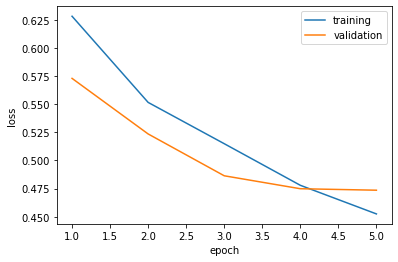

In [ ]:
_plot(epoch_nums1, training_loss1, validation_loss1)

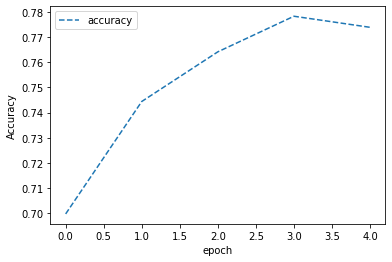

In [ ]:
plt.plot(acc1, label = "accuracy", linestyle="--")
plt.xlabel("epoch")
plt.ylabel("Accuracy")
plt.legend()

##7) Grid Search kiến trúc CNN dựa trên việc tổng quát hóa một thiết kế câu 6.

In [ ]:
!pip install optuna

     |████████████████████████████████| 308 kB 5.5 MB/s 
     |████████████████████████████████| 81 kB 9.0 MB/s 
     |████████████████████████████████| 210 kB 56.4 MB/s 
     |████████████████████████████████| 75 kB 4.3 MB/s 
     |████████████████████████████████| 49 kB 5.9 MB/s 
     |████████████████████████████████| 150 kB 62.3 MB/s 
     |████████████████████████████████| 113 kB 61.9 MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11137 sha256=c1d18c46a67f15a26df294adc7c519794205a115146524896fc396c1056c8530
  Stored in directory: /root/.cache/pip/wheels/9f/18/84/8f69f8b08169c7bae2dde6bd7daf0c19fca8c8e500ee620a28
Successfully built pyperclip


In [ ]:
BATCHSIZE = 128
CLASSES = 2
EPOCHS = 10
input_shape=(224,224,3)

In [ ]:
import optuna
from optuna.trial import TrialState

In [ ]:
def objective(trial):
    model = keras.Sequential()
    model.add(
        keras.layers.Conv2D(
            filters=trial.suggest_categorical("filters", [32, 64]),
            kernel_size=trial.suggest_categorical("kernel_size", [3, 5]),
            activation=trial.suggest_categorical("activation", ["relu", "linear"]),
            input_shape=input_shape,
        )
    )
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(CLASSES, activation="softmax"))

    # We compile our model with a sampled learning rate.
    lr = trial.suggest_float("lr", 1e-5, 1e-1, log=True)
    model.compile(
        loss="categorical_crossentropy", optimizer=tensorflow.keras.optimizers.RMSprop(lr=lr), metrics=["accuracy"]
    )

    model.fit(
        train_generator,
        shuffle=True,
        batch_size=BATCHSIZE,
        epochs=EPOCHS,
        verbose=False,
    )

    # Evaluate the model accuracy on the validation set.
    score = model.evaluate_generator(validation_generator, 400)
    return score[1]

In [ ]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=5, timeout=10)

print("Number of finished trials: {}".format(len(study.trials)))

[I 2022-02-28 04:34:39,065] A new study created in memory with name: no-name-5e3eecea-f5ff-4127-8ef6-baab1241dbea
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.


[I 2022-02-28 04:56:02,279] Trial 0 finished with value: 0.6656000018119812 and parameters: {'filters': 32, 'kernel_size': 3, 'activation': 'relu', 'lr': 0.0022917784807249034}. Best is trial 0 with value: 0.6656000018119812.


Number of finished trials: 1


In [ ]:
print("Best trial:")
trial = study.best_trial
print("  Value: {}".format(trial.value))

Best trial:
  Value: 0.6656000018119812


In [ ]:
print("  Params: ")
for key, value in trial.params.items():
        print("    {}: {}".format(key, value))

  Params: 
    filters: 32
    kernel_size: 3
    activation: relu
    lr: 0.0022917784807249034


Huấn luyện lại

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, 3,activation="relu",input_shape=input_shape))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(CLASSES, activation="softmax"))

In [ ]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 flatten_8 (Flatten)         (None, 1577088)           0         
                                                                 
 dense_94 (Dense)            (None, 2)                 3154178   
                                                                 
Total params: 3,155,074
Trainable params: 3,155,074
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# We compile our model with a sampled learning rate.
lr = 0.0022917784807249034
model.compile(
    loss="categorical_crossentropy", optimizer=tensorflow.keras.optimizers.RMSprop(lr=lr), metrics=["accuracy"]
)


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:

H = model.fit(
    train_generator,
    batch_size=BATCHSIZE,
    epochs=5,
    validation_data=validation_generator
)

Epoch 1/5
450/450 [==============================] - 141s 313ms/step - loss: 0.1972 - accuracy: 0.9863 - val_loss: 2.0297 - val_accuracy: 0.6832
Epoch 2/5
450/450 [==============================] - 140s 311ms/step - loss: 0.2440 - accuracy: 0.9853 - val_loss: 2.2868 - val_accuracy: 0.6860
Epoch 3/5
450/450 [==============================] - 139s 309ms/step - loss: 0.1578 - accuracy: 0.9881 - val_loss: 2.7566 - val_accuracy: 0.6852
Epoch 4/5
450/450 [==============================] - 141s 313ms/step - loss: 0.1852 - accuracy: 0.9885 - val_loss: 2.7990 - val_accuracy: 0.6680
Epoch 5/5
450/450 [==============================] - 141s 314ms/step - loss: 0.2867 - accuracy: 0.9874 - val_loss: 3.5144 - val_accuracy: 0.6788


Độ chính xác được cải thiện hơn. Tuy nhiên, mô hình này có hiện tượng overfitting.

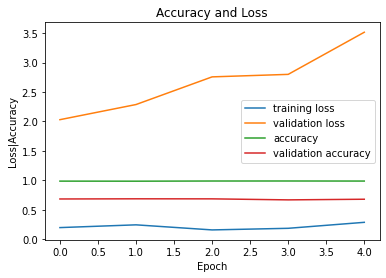

In [ ]:
  fig = plt.figure()
  numOfEpoch = 5
  plt.plot(np.arange(0, numOfEpoch), H.history['loss'], label='training loss')
  plt.plot(np.arange(0, numOfEpoch), H.history['val_loss'], label='validation loss')
  plt.plot(np.arange(0, numOfEpoch), H.history['accuracy'], label='accuracy')
  plt.plot(np.arange(0, numOfEpoch), H.history['val_accuracy'], label='validation accuracy')
  plt.title('Accuracy and Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss|Accuracy')
  plt.legend()


##8) Huấn luyện lại mô hình bằng kiến trúc ResNet và MobileNet. Đánh giá chi phí tính toán và submit kết quả độ chính xác trên các ảnh thuộc folder test.

###Resnet

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input,decode_predictions

import tensorflow.keras as keras
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, UpSampling2D, Flatten, BatchNormalization, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras import optimizers
from keras.datasets import cifar100
import tensorflow as tf
from keras.utils import np_utils
import numpy as np
import matplotlib.pyplot as plt
import time
from skimage.transform import resize
# from keras.applications.resnet50 import preprocess_input, decode_predictions
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
image_width = 128
image_height = 128
image_size = (image_width, image_height)

train_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(
        '/content/drive/MyDrive/DLK1/Data_Cat_Dog/train',  # this is the target directory
        target_size=image_size,  # all images will be resized to 224x224
        batch_size=16,
        class_mode='binary')



Found 25000 images belonging to 2 classes.


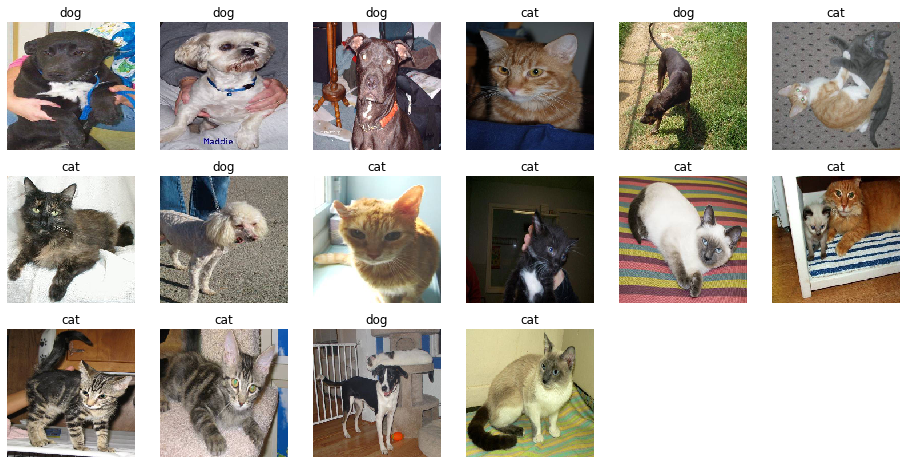

In [ ]:
x, y = train_generator.next()

plt.figure(figsize=(16, 8))
for i, (img, label) in enumerate(zip(x, y)):
    plt.subplot(3, 6, i+1)
    if label == 1:
        plt.title('dog')
    else:
        plt.title('cat')
    plt.axis('off')
    plt.imshow(img, interpolation="nearest")

In [ ]:
print(x.shape)

(16, 224, 224, 3)


In [ ]:
print(y)

[0. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1.]


In [ ]:
# 1. Nạp các thư viện cần thiết
import keras
from tensorflow import keras
#from keras.models import Sequential
#from keras.layers import Dense, Dropout, Flatten, BatchNormalization
from tensorflow.keras.optimizers import SGD
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras import backend as K
#from keras.layers.convolutional import Conv2D
#from keras.layers.convolutional import MaxPooling2D
from keras import regularizers
from keras.utils.np_utils import to_categorical

#import cv2
import os
#from keras.preprocessing.image import ImageDataGenerator
#from tensorflow.keras import backend as K
from keras.models import Sequential, Model,load_model
#from keras.callbacks import EarlyStopping,ModelCheckpoint
#from google.colab.patches import cv2_imshow
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D,MaxPool2D
from keras.preprocessing import image
from keras.initializers import glorot_uniform

In [ ]:
#2 thiết lập epochs, batch size và số đầu ra của mạng nơ ron
batch_size = 128
num_classes = 2
epochs = 5

In [ ]:
def identity_block(X, f, filters, stage, block):
   
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'
    F1, F2, F3 = filters

    X_shortcut = X
   
    X = Conv2D(filters=F1, kernel_size=(1, 1), strides=(1, 1), padding='valid', name=conv_name_base + '2a', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2a')(X)
    X = Activation('relu')(X)

    X = Conv2D(filters=F2, kernel_size=(f, f), strides=(1, 1), padding='same', name=conv_name_base + '2b', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2b')(X)
    X = Activation('relu')(X)

    X = Conv2D(filters=F3, kernel_size=(1, 1), strides=(1, 1), padding='valid', name=conv_name_base + '2c', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2c')(X)

    X = Add()([X, X_shortcut])# SKIP Connection
    X = Activation('relu')(X)

    return X

In [ ]:
def convolutional_block(X, f, filters, stage, block, s=2):
   
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'

    F1, F2, F3 = filters

    X_shortcut = X

    X = Conv2D(filters=F1, kernel_size=(1, 1), strides=(s, s), padding='valid', name=conv_name_base + '2a', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2a')(X)
    X = Activation('relu')(X)

    X = Conv2D(filters=F2, kernel_size=(f, f), strides=(1, 1), padding='same', name=conv_name_base + '2b', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2b')(X)
    X = Activation('relu')(X)

    X = Conv2D(filters=F3, kernel_size=(1, 1), strides=(1, 1), padding='valid', name=conv_name_base + '2c', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2c')(X)

    X_shortcut = Conv2D(filters=F3, kernel_size=(1, 1), strides=(s, s), padding='valid', name=conv_name_base + '1', kernel_initializer=glorot_uniform(seed=0))(X_shortcut)
    X_shortcut = BatchNormalization(axis=3, name=bn_name_base + '1')(X_shortcut)

    X = Add()([X, X_shortcut])
    X = Activation('relu')(X)

    return X

In [ ]:
def ResNet(input_shape=(128, 128, 3)):

    X_input = Input(input_shape)

    X = ZeroPadding2D((3, 3))(X_input)

    X = Conv2D(64, (7, 7), strides=(2, 2), name='conv1', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name='bn_conv1')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((3, 3), strides=(2, 2))(X)

    X = convolutional_block(X, f=3, filters=[64, 64, 256], stage=2, block='a', s=1)
    X = identity_block(X, 3, [64, 64, 256], stage=2, block='b')
    X = identity_block(X, 3, [64, 64, 256], stage=2, block='c')


    X = AveragePooling2D(pool_size=(2, 2), padding='same')(X)
    
    model = Model(inputs=X_input, outputs=X, name='ResNet50')

    return model

In [ ]:
base_model = ResNet(input_shape=(128, 128, 3))

In [ ]:
headModel = base_model.output
headModel = Flatten()(headModel)
headModel=Dense(64, activation='relu', name='fc1',kernel_initializer=glorot_uniform(seed=0))(headModel)
headModel=Dense(32, activation='relu', name='fc2',kernel_initializer=glorot_uniform(seed=0))(headModel)
headModel = Dense( 2,activation='softmax', name='fc3',kernel_initializer=glorot_uniform(seed=0))(headModel)

In [ ]:
model = Model(inputs=base_model.input, outputs=headModel)

In [ ]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d_4 (ZeroPadding2  (None, 134, 134, 3)  0          ['input_5[0][0]']                
 D)                                                                                               
                                                                                                  
 conv1 (Conv2D)                 (None, 64, 64, 64)   9472        ['zero_padding2d_4[0][0]']       
                                                                                            

In [ ]:
# 6. Compile model, chỉ rõ hàm loss_function nào được sử dụng, phương thức 
# đùng để tối ưu hàm loss function.
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
# 7. Thực hiện train model với data
num_epochs = 5
history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // batch_size,
    epochs = num_epochs)

Epoch 1/5
136/136 [==============================] - 1944s 14s/step - loss: 2.0407 - accuracy: 0.5806 - val_loss: 0.6904 - val_accuracy: 0.5321
Epoch 2/5
136/136 [==============================] - 1224s 9s/step - loss: 0.7227 - accuracy: 0.6615 - val_loss: 0.6279 - val_accuracy: 0.6514
Epoch 3/5
136/136 [==============================] - 789s 6s/step - loss: 0.5204 - accuracy: 0.7497 - val_loss: 0.5883 - val_accuracy: 0.6955
Epoch 4/5
136/136 [==============================] - 626s 5s/step - loss: 0.4810 - accuracy: 0.7744 - val_loss: 0.6222 - val_accuracy: 0.6717
Epoch 5/5
136/136 [==============================] - 588s 4s/step - loss: 0.4441 - accuracy: 0.7926 - val_loss: 0.6002 - val_accuracy: 0.7066


In [ ]:
def graph(ne, H):
  fig = plt.figure()
  numOfEpoch = ne
  plt.plot(np.arange(0, numOfEpoch), H.history['loss'], label='training loss')
  plt.plot(np.arange(0, numOfEpoch), H.history['val_loss'], label='validation loss')
  plt.plot(np.arange(0, numOfEpoch), H.history['accuracy'], label='accuracy')
  plt.plot(np.arange(0, numOfEpoch), H.history['val_accuracy'], label='validation accuracy')
  plt.title('Accuracy and Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss|Accuracy')
  plt.legend()

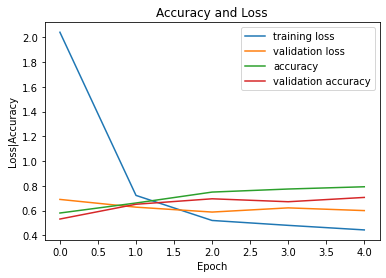

In [ ]:
graph(5,history)

Mô hình Resnet cho độ chính xác cao hơn so với CNN. Tuy nhiên thời gian huấn luyện lâu hơn do mạng này có số lớp nhiều hơn

###MobileNet

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout,GlobalAveragePooling2D
from tensorflow.keras.applications.mobilenet import MobileNet, preprocess_input
import math
import pandas as pd
import numpy as np

In [ ]:
NUM_CLASSES = 2
IMG_WIDTH, IMG_HEIGHT = 128, 128
BATCH_SIZE = 64

In [ ]:
def model_maker():
  base_model = MobileNet(include_top=False,
  input_shape=(IMG_WIDTH, IMG_HEIGHT, 3))
  for layer in base_model.layers[:]:
    layer.trainable = False
    input = Input(shape=(IMG_WIDTH, IMG_HEIGHT, 3))
    my_model = base_model(input)
    my_model = GlobalAveragePooling2D()(my_model)
    my_model = Dense(64, activation='relu')(my_model)
    my_model = Dropout(0.5)(my_model)
  predictions = Dense(NUM_CLASSES, activation='softmax')(my_model)       
  return Model(inputs=input, outputs=predictions)

In [ ]:
model = model_maker()
model.compile(loss='categorical_crossentropy',
optimizer=tf.keras.optimizers.SGD(0.01),metrics=['acc'])

17235968/17225924 [==============================] - 0s 0us/step


In [ ]:
H=model.fit_generator(train_generator,epochs=5,validation_data=validation_generator)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/5
350/350 [==============================] - 5586s 16s/step - loss: 0.1873 - acc: 0.9228 - val_loss: 0.0837 - val_acc: 0.9667
Epoch 2/5
350/350 [==============================] - 351s 1s/step - loss: 0.1050 - acc: 0.9606 - val_loss: 0.0732 - val_acc: 0.9723
Epoch 3/5
350/350 [==============================] - 351s 1s/step - loss: 0.0907 - acc: 0.9648 - val_loss: 0.0707 - val_acc: 0.9735
Epoch 4/5
350/350 [==============================] - 349s 998ms/step - loss: 0.0822 - acc: 0.9675 - val_loss: 0.0690 - val_acc: 0.9731
Epoch 5/5
350/350 [==============================] - 354s 1s/step - loss: 0.0759 - acc: 0.9710 - val_loss: 0.0673 - val_acc: 0.9749


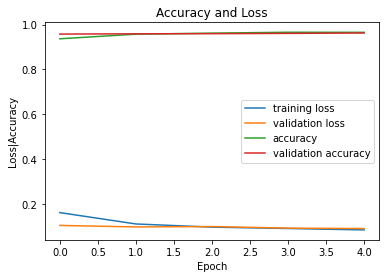

In [ ]:
  fig = plt.figure()
  numOfEpoch = 5
  plt.plot(np.arange(0, numOfEpoch), H.history['loss'], label='training loss')
  plt.plot(np.arange(0, numOfEpoch), H.history['val_loss'], label='validation loss')
  plt.plot(np.arange(0, numOfEpoch), H.history['acc'], label='accuracy')
  plt.plot(np.arange(0, numOfEpoch), H.history['val_acc'], label='validation accuracy')
  plt.title('Accuracy and Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss|Accuracy')
  plt.legend()

**Nhận xét**: Mạng Mobilenet không có hiện tượng overfitting, thời gian huấn luyện ít hơn so với Resnet nhưng độ chính xác lại cao hơn (cao nhất trong các kiến trúc mạng khảo sát trong bài này)

###Submit kết quả lên Kaggle

In [ ]:
test_path = "/content/drive/MyDrive/DLK1/Data_Cat_Dog/test"
test_filenames = os.listdir(test_path)

In [ ]:
test_filenames

test_df = pd.DataFrame({'id': test_filenames,})
test_df

,id
0,003664.jpg
1,001747.jpg
2,001688.jpg
3,002731.jpg
4,001179.jpg
...,...
8005,006721.jpg
8006,006999.jpg
8007,000224.jpg
8008,003916.jpg


In [ ]:
test_data = ImageDataGenerator(rescale=1./255)
test_data

In [ ]:
test_data_gen = test_data.flow_from_dataframe(
    test_df, 
    test_path, 
    x_col='id',
    y_col=None,
    class_mode=None,
    target_size=(224, 224),
    batch_size=64,
    shuffle=False
)

In [ ]:
filenames = test_data_gen.filenames
nb_samples = len(filenames)

In [ ]:
predictions = model.predict_generator(test_data_gen,nb_samples)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  """Entry point for launching an IPython kernel.


In [ ]:
len(predictions)

8010

In [ ]:
print(predictions.shape)

(8010, 2)


In [ ]:
print(predictions[0])

[0.00667337 0.99332666]


In [ ]:
print(np.argmax(predictions[0]))

1


In [ ]:
print(type(predictions))

<class 'numpy.ndarray'>


In [ ]:
from pandas._libs.tslibs.conversion import precision_from_unit
precision_from_unit

<function pandas._libs.tslibs.conversion.precision_from_unit>

In [ ]:
results = np.zeros(len(predictions))

In [ ]:
print(results)

[0. 0. 0. ... 0. 0. 0.]


In [ ]:
results = np.zeros(len(predictions))
for i in range(8010):
  results[i] = np.argmax(predictions[i]).astype(int)

In [ ]:
print(results[10])

0.0


In [ ]:
results = pd.DataFrame(results)
results.columns = ['labels']

In [ ]:
label = []
for i in results['labels']:
    if i ==0:
        label.append('cat')
    else:
        label.append('dog')

In [ ]:
test_df['label'] =results['labels']

In [ ]:
test_df = test_df.sort_values(by='id')

In [ ]:
test_df.to_csv("submission.csv",index = False)

9) Thử nghiệm các phương pháp Augmentation như Flip, Rotation, Random Crop, Bright Contrast để cải thiện kết quả mô hình.

In [ ]:
datagen = ImageDataGenerator(rescale=1./255, # normalize pixel values
                             validation_split=0.3) # hold back 30% of the images for validation

In [ ]:


print("Preparing training dataset...")
train_generator = datagen.flow_from_directory(
    data_folder,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training') # set as training data

print("Preparing validation dataset...")
validation_generator = datagen.flow_from_directory(
    data_folder,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation') # set as validation data

Preparing training dataset...
Found 17500 images belonging to 2 classes.
Preparing validation dataset...
Found 7500 images belonging to 2 classes.


In [ ]:
aug_train = ImageDataGenerator(rescale=1./255, 
                               rotation_range=30, 
                               width_shift_range=0.3,
                               height_shift_range=0.3,
                               zoom_range=0.5,    
                               horizontal_flip=True)
# augementation cho test
aug_valid= ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = aug_train.flow_from_directory(data_folder,
    target_size=(128, 128),
    class_mode='binary',
    batch_size=32)

Found 25000 images belonging to 2 classes.


In [ ]:
H = model.fit(aug_train.flow(train_generator), 
                                              epochs=5)

Dữ liệu lớn, vượt quá giới hạn tài nguyên của máy tính nên không thực hiện được kỹ thuật Augmentation.






10) Lập bảng kết quả các thử nghiệm đã sử dụng.

In [ ]:
import pandas as pd



In [ ]:
result = pd.DataFrame({'Architecture neural network': ['CNN','ResNet', 'MobileNet'], 
                              'Accuracy': ['0.7636', '0.7926', '0.9710']})


In [ ]:
result

,Architecture neural network,Accuracy
0,CNN,0.7636
1,ResNet,0.7926
2,MobileNet,0.9710
